# Installing Packages needed and Importing Libraries

In [1]:
!pip install openpyxl  --quiet

معرفی پکیج و کتابخانه ها 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import string
import tensorflow as tf
import re
import os
import time
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

مشخص کردن اندازه طول کدگذار و کدگشا  
مقدار دهی اولیه کردن به پارامتر ها

In [3]:
ENCODER_LEN = 200
DECODER_LEN = 70
BATCH_SIZE = 64
BUFFER_SIZE = BATCH_SIZE*8

# Dataset

After creating the dataframe we apply Start of Sentence(<SOS>) and End of Sentence(<EOS>) tokens.
These sentences are then tokenized and padded to fix length.

In [4]:
duc=pd.read_excel("duc_2004.xlsx",engine = 'openpyxl')

In [5]:
duc.head()

,text,summary1,summary2,summary3,summary4
0,cambodian leader hun sen on friday rejected op...,Cambodian government rejects opposition's call...,Cambodian leader Hun Sen rejects opposition de...,"Hun Sen rejects out of country talks, Sihanouk...",New Cambodian government in limbo as Hun Sen r...
1,king norodom sihanouk has declined requests to...,Sihanouk refuses to chair Cambodian political ...,Sihanouk refuses to host talks of Cambodian po...,"Efforts to form a government deadlocked, Sihan...",Norodom Sihanouk declines role to mediate in C...
2,cambodia 's two-party opposition asked the asi...,"Opposition asks end to loans to ""illegal"" Camb...",Cambodian opposition asks ADB to stop loans to...,Cambodia's two-party opposition seeks to block...,Opponents of Cambodian government ask Asian De...
3,cambodia 's ruling party responded tuesday to ...,Cambodian party defends leader Hun Sen against...,CPP defends Hun Sen to US Senate. Asks rejecti...,Cambodia's ruling party seeks to counter human...,US House seeks probe of Cambodian rights viola...
4,cambodia 's leading opposition party ruled out...,Cambodian party rejects government offer to sh...,FUNCINPEC refuses to share presidency with CPP...,Disputes over presidency block efforts to form...,Opposition Royalists reject power sharing and ...


In [6]:
news = pd.read_excel("inshorts.xlsx",engine = 'openpyxl')
news.drop(['Source ', 'Time ', 'Publish Date'], axis=1, inplace=True)
news.head()
print(f'Dataset size: {len(news)}')

Dataset size: 55104


In [7]:
duc_columns = duc.columns.tolist()
duc_columns.remove('text')
duc_columns.remove('summary1')
duc.drop(duc_columns, axis='columns', inplace=True)


In [8]:
duc

,text,summary1
0,cambodian leader hun sen on friday rejected op...,Cambodian government rejects opposition's call...
1,king norodom sihanouk has declined requests to...,Sihanouk refuses to chair Cambodian political ...
2,cambodia 's two-party opposition asked the asi...,"Opposition asks end to loans to ""illegal"" Camb..."
3,cambodia 's ruling party responded tuesday to ...,Cambodian party defends leader Hun Sen against...
4,cambodia 's leading opposition party ruled out...,Cambodian party rejects government offer to sh...
...,...,...
495,"german foreign minister joschka fischer , who ...",German Foreign Minister says China's arrest of...
496,the trials of three outspoken dissidents over ...,President Jiang vows to crush any challenges t...
497,"his friend and political mentor is jailed , ro...",China Democracy Party vows to campaign for cha...
498,by sentencing two of the country 's most promi...,China's arrest of dissidents could destroy Chi...


In [9]:
duc.rename(columns = { 'summary1':'Headline','text':'Short'}, inplace = True)

In [10]:
duc

,Short,Headline
0,cambodian leader hun sen on friday rejected op...,Cambodian government rejects opposition's call...
1,king norodom sihanouk has declined requests to...,Sihanouk refuses to chair Cambodian political ...
2,cambodia 's two-party opposition asked the asi...,"Opposition asks end to loans to ""illegal"" Camb..."
3,cambodia 's ruling party responded tuesday to ...,Cambodian party defends leader Hun Sen against...
4,cambodia 's leading opposition party ruled out...,Cambodian party rejects government offer to sh...
...,...,...
495,"german foreign minister joschka fischer , who ...",German Foreign Minister says China's arrest of...
496,the trials of three outspoken dissidents over ...,President Jiang vows to crush any challenges t...
497,"his friend and political mentor is jailed , ro...",China Democracy Party vows to campaign for cha...
498,by sentencing two of the country 's most promi...,China's arrest of dissidents could destroy Chi...


In [11]:
news

,Headline,Short
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a..."
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...
...,...,...
55099,Sensex loses 400 points to hit 52-week low,"Tracking weak cues from the Asian markets, the..."
55100,China to inject $91 bn into the money markets,Amid growing concerns about China&#39;s econom...
55101,Ghulam Ali set to make acting debut in Bollywood,Pakistani Ghazal singer Ghulam Ali will soon m...
55102,IS acknowledges death of Jihadi John: Report,The Islamic State (IS) has acknowledged the de...


In [12]:
#df = pd.concat([duc, news])
#del df1, df2
df = pd.concat([duc, news], ignore_index=True, sort=False)
# Shuffling the df
df = df.sample(frac=1).reset_index(drop=True)

print(f'Dataset size: {len(df)}')
news=df

Dataset size: 55604


In [13]:
news.head()

,Short,Headline
0,Saudi Foreign Minister Adel al-Jubeir has made...,Saudi Foreign Minister makes rare visit to Bag...
1,After getting back home to Srinagar following ...,Who will return my 12 years: Man freed in Delh...
2,The Bombay High Court has directed the Maharas...,What steps taken to protect kids of women pris...
3,The death toll from the recent earthquakes in ...,Japan earthquakes death toll rises to 48
4,Reacting to Australian Open finalists Roger Fe...,Twitter reacts to Federer-Nadal wearing simila...


In [14]:
text= " my name is sandeep&#39;s kumar"
text=text.replace(r'&#39;','`')#.replace(r'&#39;','`', regex=True).replace(r'&amp','&', regex=True).replace(r'&#34;','"', regex=True)

In [15]:
text

' my name is sandeep`s kumar'

In [16]:
news=news.replace(r'&#45;','-', regex=True).replace(r'&#39;','`', regex=True).replace(r'&amp','&', regex=True).replace(r'&#34;','"', regex=True)
news.head()

,Short,Headline
0,Saudi Foreign Minister Adel al-Jubeir has made...,Saudi Foreign Minister makes rare visit to Bag...
1,After getting back home to Srinagar following ...,Who will return my 12 years: Man freed in Delh...
2,The Bombay High Court has directed the Maharas...,What steps taken to protect kids of women pris...
3,The death toll from the recent earthquakes in ...,Japan earthquakes death toll rises to 48
4,Reacting to Australian Open finalists Roger Fe...,Twitter reacts to Federer-Nadal wearing simila...


In [17]:
article = news['Short']
summary = news['Headline']

استفاده از پکیج مدل عنوانی 
  اسخراج بیشترین موضوعات پرتکرار در مجموعه سند

In [20]:
#Topic model(1)

from bertopic import BERTopic

topic_model = BERTopic()
def topicdocument(document,n):

  article1=stopwordremove(document)
  topics, probs = topic_model.fit_transform(article1)
  stringtopic=""
  for i in range(0,n,1):
      print(topic_model.get_topic(i))
      #print(topic_model.get_topic(i)[0:5][1][0])
      stringtopic+=topic_model.get_topic(i)[0:5][0][0]+" "

  return stringtopic
stringtopic=topicdocument(article,15)

[('flight', 0.015423347606664167), ('airport', 0.01373487963095427), ('airline', 0.01223436439909943), ('passengers', 0.010871954294333493), ('air', 0.01039974603971539), ('airlines', 0.010293504435260052), ('plane', 0.010092524991600781), ('aviation', 0.009880490809554327), ('air india', 0.00892362155867889)]
[('education', 0.013484158872588038), ('students', 0.013331491115902937), ('schools', 0.011908486474594358), ('teachers', 0.010172429385111589), ('class', 0.009523887793198514), ('school', 0.007570027338965135), ('hrd', 0.007178080072343843), ('iits', 0.006776636457409627), ('iit', 0.006649997277855046)]
[('rape', 0.01456582863743595), ('raped', 0.009403961341946415), ('woman', 0.009020470082640926), ('sexual', 0.008754170107025937), ('girl', 0.008444032502946697), ('accused', 0.0067124188744526045), ('sexually', 0.006591032709368342), ('molestation', 0.0065433212401277184), ('allegedly', 0.006532915381733781)]
[('railway', 0.017519115501656562), ('railways', 0.01726444601744414)

In [21]:
article = article.apply(lambda x: '<SOS> ' + x + ' <EOS>')
summary = summary.apply(lambda x: '<SOS> ' + x + ' <EOS>')

In [22]:
def preprocess(text):
    text = re.sub(r"&.[1-9]+;"," ",text)
    return text
article = article.apply(lambda x: preprocess(x))
summary = summary.apply(lambda x: preprocess(x))

In [23]:
article[8]

'<SOS> Ten prison inmates were killed and the warden was seriously injured in a suspected grenade blast and gunfire at a Philippine jail, police officials said. The casualties included eight criminals facing drug charges, two of whom were alleged Chinese drug criminals. The police are reportedly investigating whether the incident was an escape attempt and are waiting for\u200b the warden`s statement. <EOS>'

In [24]:

print("****************************")
summary[8]

****************************


'<SOS> 10 killed in blast, gunfire at Philippine jail <EOS>'

In [25]:
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'
article_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)
article_tokenizer.fit_on_texts(article)
summary_tokenizer.fit_on_texts(summary)
inputs = article_tokenizer.texts_to_sequences(article)
topics=article_tokenizer.texts_to_sequences(stringtopic)
targets = summary_tokenizer.texts_to_sequences(summary)

In [26]:
ENCODER_VOCAB = len(article_tokenizer.word_index) + 1
DECODER_VOCAB = len(summary_tokenizer.word_index) + 1
print(ENCODER_VOCAB, DECODER_VOCAB)

76618 29955


In [27]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=ENCODER_LEN, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=DECODER_LEN, padding='post', truncating='post')
inputs = tf.cast(inputs, dtype=tf.int64)
topics = tf.cast(topics, dtype=tf.int64)
print(inputs.shape)
targets = tf.cast(targets, dtype=tf.int64)

(352, 100)
(55604, 100)


In [28]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
topics = tf.data.Dataset.from_tensor_slices((topics)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Transformer Model

The next several blocks of code contain the vanilla Transformer model.

If you want to know about what they are and how they work I suggest this video: https://www.youtube.com/watch?v=4Bdc55j80l8

It does an excellent job of giving an overview about them and helped me in understanding them.

In [30]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights


In [31]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)

        return output, attention_weights

def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [32]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

در بخش لایه های کدگشا  
تغییرات معماری  در بخش کدگشا صورت میگیرد

In [33]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.mha3 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm4 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        self.dropout4 = tf.keras.layers.Dropout(rate)


    def call(self, x, enc_output, training, look_ahead_mask, padding_mask,top):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)


        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, top, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + enc_output)



        attn3, attn_weights_block3 = self.mha3(out2, out2, out1, padding_mask)
        attn3 = self.dropout3(attn3, training=training)
        out3 = self.layernorm3(attn3 + out1)


        ffn_output = self.ffn(out3)
        ffn_output = self.dropout4(ffn_output, training=training)
        out4 = self.layernorm4(ffn_output + out3)

        return out4, attn_weights_block1,attn_weights_block2,attn_weights_block3

In [34]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

class Decoder(tf.keras.layers.Layer):

    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask,top):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float64))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2,block3= self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask,top)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block3


        return x, attention_weights


کلاس ترانسفورمر دارای
کدگذاری متن اصلی و موضوعات درون متنی و بخش کدگشا

In [35]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask,valuetopic):
        enc_output = self.encoder(inp, training, enc_padding_mask)


        topic_enc = self.encoder(valuetopic, training, enc_padding_mask)


        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask,topic_enc)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [36]:
num_layers = 3
d_model = 128
dff = 512
num_heads = 4
dropout_rate = 0.2
EPOCHS = 35

# Custom Learning Rate

In [37]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
       # print(step)
        arg1 =tf.math.rsqrt(step)
        arg2 =step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [38]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

Text(0.5, 0, 'Train Step')

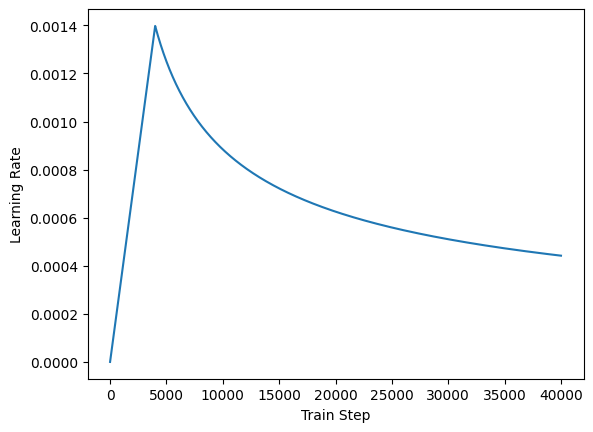

In [39]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

# Custom Loss and Accuracy

In [40]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))
    #accuracies = tf.cast(accuracies, dtype= tf.float32)

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [41]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [42]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=ENCODER_VOCAB,
    target_vocab_size=DECODER_VOCAB,
    pe_input=1000,
    pe_target=1000)

In [43]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [44]:
checkpoint_path = "checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [45]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            True,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,topic
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(accuracy_function(tar_real, predictions))

# Training the Model

It trained on two time for epoch=15 ( loss upto 3.somthing and accuracy upto 33.something) and epoch=15 so total 30 epochs

In [46]:
for epoch in range(35):
        start = time.time()

        train_loss.reset_states()

        for (batch, (inp, tar)) in enumerate(dataset):
            train_step(inp, tar)

            if batch % 100 == 0:
                print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

        if (epoch + 1) % 5 == 0:
            ckpt_save_path = ckpt_manager.save()
            print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

        print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
        print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))





Epoch 1 Batch 0 Loss 10.3236 Accuracy 0.0000
Epoch 1 Batch 100 Loss 10.2030 Accuracy 0.0640
Epoch 1 Batch 200 Loss 9.9875 Accuracy 0.0837
Epoch 1 Batch 300 Loss 9.6830 Accuracy 0.0903
Epoch 1 Batch 400 Loss 9.3377 Accuracy 0.0935
Epoch 1 Batch 500 Loss 9.0213 Accuracy 0.0955
Epoch 1 Batch 600 Loss 8.7769 Accuracy 0.0972
Epoch 1 Batch 700 Loss 8.5875 Accuracy 0.1006
Epoch 1 Batch 800 Loss 8.4334 Accuracy 0.1042
next epoch
Epoch 2 Batch 0 Loss 7.2337 Accuracy 0.1064
Epoch 2 Batch 100 Loss 7.1768 Accuracy 0.1097
Epoch 2 Batch 200 Loss 7.1317 Accuracy 0.1129
Epoch 2 Batch 300 Loss 7.0755 Accuracy 0.1158
Epoch 2 Batch 400 Loss 7.0213 Accuracy 0.1186
Epoch 2 Batch 500 Loss 6.9649 Accuracy 0.1214
Epoch 2 Batch 600 Loss 6.9088 Accuracy 0.1243
Epoch 2 Batch 700 Loss 6.8568 Accuracy 0.1270
Epoch 2 Batch 800 Loss 6.8047 Accuracy 0.1295
next epoch
Epoch 3 Batch 0 Loss 6.4554 Accuracy 0.1314
Epoch 3 Batch 100 Loss 6.2750 Accuracy 0.1340
Epoch 3 Batch 200 Loss 6.2402 Accuracy 0.1366
Epoch 3 Batch 30

# Evaluation

In [51]:
def evaluate(input_article):

    topicsdoc, similarity = topic_model.find_topics(input_article, top_n=10)
    tpics=""
    for i in range(0,3,1):
        tpics=tpics + topic_model.get_topic(topicsdoc[i])[0][0]+" "

    input_article = article_tokenizer.texts_to_sequences([input_article])
    tpics = article_tokenizer.texts_to_sequences([tpics])

    input_article = tf.keras.preprocessing.sequence.pad_sequences(input_article, maxlen=ENCODER_LEN,
                                                                   padding='post', truncating='post')
    tpics = tf.keras.preprocessing.sequence.pad_sequences(tpics, maxlen=ENCODER_LEN,
                                                                   padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_article[0], 0)
    encoder_tpics = tf.expand_dims(tpics[0], 0)

    decoder_input = [summary_tokenizer.word_index['<sos>']]
    output = tf.expand_dims(decoder_input, 0)

    for i in range(DECODER_LEN):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input,
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,encoder_tpics
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index['<eos>']:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summarize(input_article):
    input_article=preprocess(input_article)
    summarized = evaluate(input_article=input_article)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)
    return summary_tokenizer.sequences_to_texts(summarized)[0]

Predicted_Summary=[]
Real_Summary=[]
for i in range(0,800,1):
  if(i % 5 == 0):
    print(i)
  Predicted_Summary.append(summarize(article[i]))
  Real_Summary.append(summary[i][5:-5])

0
5
10
15
20
25


In [ ]:
def summarize(input_article):
    input_article=preprocess(input_article)
    summarized = evaluate(input_article=input_article)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)
    return summary_tokenizer.sequences_to_texts(summarized)[0]

In [ ]:
!pip install evaluate
!pip install rouge-score

In [ ]:
import evaluate
rouge = evaluate.load('rouge')

results = rouge.compute(predictions=Predicted_Summary, references=Real_Summary)
print(results)

# Predictions

Below me make predictions on some texts to see how the model is performimg. Since this was a very basic approach the model wont perform that well but it can surely be improved.

In [ ]:
print("Real Headline : ", summary[0][5:-5],"\n Predicted Summary : ", summarize(article[0]))
#print("base model show : Predicted Summary :  dhoni to lead jharkhand t20 trophy")

In [ ]:
article[16]

'<SOS> A probe was ordered on Friday after urea balls were reportedly found in rice bags meant for midday meals in a school in Gujarat`s Valsad district. The staff had reportedly bought three bags of rice from a government-run fair price shop. The samples were then sent for tests and the stock at the concerned shop was also checked. <EOS>'

In [ ]:
print("Real Headline : ", summary[16][5:-5],"\nPredicted Summary : ", summarize(article[16]))

Real Headline :   Urea found in midday meal rice; probe ordered  
Predicted Summary :  urea found in midday meal rice probe ordered


In [ ]:
article[23]

'<SOS> The third Test between England and Sri Lanka ended in a draw after the fifth day`s play was stopped due to rain. Chasing down a total of 362 to win the Test, Sri Lanka were playing at 78/1 before rain prevented any further play. With the draw, Sri Lanka have successfully remained unbeaten at Lord`s for the past 25 years. <EOS>'

In [ ]:
print("Real Headline : ", summary[0][5:-5],"\nPredicted Summary : ", summarize(article[0]))
#Predicted Summary :  india shows responsible with nuclear weapons us

Real Headline :   India claiming militants along LoC to disturb PoK: Pak Army  
Predicted Summary :  india s aggression pak army to disturb pok pak army


In [ ]:
print("Real Headline : ", summary[23][5:-5],"\nPredicted Summary : ", summarize(article[23]))
#Predicted Summary :  autopilot user when we are over cars killed tesla asks autopilot

Real Headline :   PM’s foreign tours not benefiting India: Dikshit  
Predicted Summary :  return of india from leaving is someone says singh


In [ ]:
print("Real Headline : ", summary[0][5:-5],"\nPredicted Summary : ", summarize(article[0]))

Real Headline :   India claiming militants along LoC to disturb PoK: Pak Army  
Predicted Summary :  india s aggression pak army to disturb pok pak army


In [ ]:
print("Real Headline : ", summary[23][5:-5],"\nPredicted Summary : ", summarize(article[23]))
#Predicted Summary :  autopilot user when we are over cars killed tesla asks autopilot

Real Headline :   PM’s foreign tours not benefiting India: Dikshit  
Predicted Summary :  return of india from leaving is someone says singh


In [ ]:
summarize("Text Summarization - as the name suggests - involves generating short summaries of text data, in a few words or sentences. A good example of this in day-to-day life is the Inshorts news summary app, which generates summaries upto max of ~ 60 words.")

'used coding language of over ends'

In [ ]:
summarize("""Cambodian leader Hun Sen on Friday rejected opposition parties' demands
for talks outside the country, accusing them of trying to ``internationalize''
the political crisis. Government and opposition parties have asked
King Norodom Sihanouk to host a summit meeting after a series of post-election
negotiations between the two opposition groups and Hun Sen's party
to form a new government failed. Opposition leaders Prince Norodom
Ranariddh and Sam Rainsy, citing Hun Sen's threats to arrest opposition
figures after two alleged attempts on his life, said they could not
negotiate freely in Cambodia and called for talks at Sihanouk's residence
in Beijing. Hun Sen, however, rejected that. ``I would like to make
it clear that all meetings related to Cambodian affairs must be conducted
in the Kingdom of Cambodia,'' Hun Sen told reporters after a Cabinet
meeting on Friday. ``No-one should internationalize Cambodian affairs.
It is detrimental to the sovereignty of Cambodia,'' he said. Hun Sen's
Cambodian People's Party won 64 of the 122 parliamentary seats in
July's elections, short of the two-thirds majority needed to form
a government on its own. Ranariddh and Sam Rainsy have charged that
Hun Sen's victory in the elections was achieved through widespread
fraud. They have demanded a thorough investigation into their election
complaints as a precondition for their cooperation in getting the
national assembly moving and a new government formed. Hun Sen said
on Friday that the opposition concerns over their safety in the country
was ``just an excuse for them to stay abroad.'' Both Ranariddh and
Sam Rainsy have been outside the country since parliament was ceremonially
opened on Sep. 24. Sam Rainsy and a number of opposition figures have
been under court investigation for a grenade attack on Hun Sen's Phnom
Penh residence on Sep. 7. Hun Sen was not home at the time of the
attack, which was followed by a police crackdown on demonstrators
contesting Hun Sen's election victory. The Sam Rainsy Party, in a
statement released Friday, accused Hun Sen of being ``unwilling to
make any compromise'' on negotiations to break the deadlock. ``A meeting
outside Cambodia, as suggested by the opposition, could place all
parties on more equal footing,'' said the statement. ``But the ruling
party refuses to negotiate unless it is able to threaten its negotiating
partners with arrest or worse.'' """)

'cambodian opposition rejects opposition party for political crisis'

In [ ]:
summarize("cambodian leader hun sen on friday rejected opposition parties ' demands for talks outside the country , accusing them of trying to `` internationalize '' the political crisis .")

'cambodian opposition rejects talks for talks over government'

Cambodian government rejects opposition's call for talks abroad


In [ ]:
#'bin laden million from behind network cricketers'
summarize("king norodom sihanouk has declined requests to chair a summit of cambodia 's top political leaders , saying the meeting would not bring any progress in deadlocked negotiations to form a government .")

'political party confirms big b s wage host contract until 2022'

In [ ]:
summarize("sometime in the summer of 1997 , an operative for osama bin laden sat down at his personal computer in a hideaway in kenya , he was worried , he wrote in an angry dispatch , about the security of the `` east africa network '' of bin laden , the saudi exile accused of masterminding a worldwide terrorist conspiracy against americans .")

'bin laden million from behind network cricketers'

In [ ]:
summarize("six months after president clinton traveled to beijing and challenged china 's leaders to move rapidly toward political reform , the administration 's policy of engaging beijing was called into question monday when chinese courts sentenced three of the nation 's most prominent dissidents to long jail sentences .")

'u s policy of policy is policy of reform'

In [ ]:
summarize("fbi agents this week began questioning relatives of the victims of the aug. 7 u.s. embassy bombing as well as the seriously injured on request of the u.s. attorney 's office for the southern district of new york , a u.s. official said thursday .")

'fbi questions us bombing suspects for bombing suspects'

In [ ]:
summarize("Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.")

'boss 10 smart engineer gets lessons at ₹10 5 yrs'

In [ ]:
summarize("Actor Ranbir Kapoor worked as an assistant director for Sanjay Leela Bhansali&#39;s &#39;Black&#39; in 2005. He is also known to have assisted in the making of the 1996 film &#39;PremGranth&#39; and his father Rishi Kapoor&#39;s directorial debut &#39;Aa Ab Laut Chalen&#39; in 1999. The actor, who has won five Filmfare awards including Best Actor for &#39;Barfi!&#39;, turned 34 on Wednesday.")

'ranbir kapoor worked as tool for black film journalist'

In [ ]:
print("Real Headline : ", summary[0][5:-5],"\nPredicted Summary : ", summarize(article[0]))

Real Headline :   India shows responsible behaviour with nuke technology: US  
Predicted Summary :  india shows responsible with nuclear weapons us


In [ ]:
summarize("The CBI on Saturday booked four former officials of Syndicate Bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. The accused had availed home loans and credit from Syndicate Bank on the basis of forged and fabricated documents. These funds were fraudulently transferred to the companies owned by the accused persons.")

'4 ex bank officials booked for cheating bank of ₹209 crore'